In [50]:
import mne
from mne.preprocessing import ICA


import mtrf
from mtrf.model import TRF
from mtrf.stats import crossval, nested_crossval
#import eelbrain as eel

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from scipy.io import wavfile, loadmat, savemat
from scipy.signal import hilbert
from scipy.stats import ttest_1samp, wilcoxon
from statannotations.Annotator import Annotator


import librosa
import librosa.display
import mido

import sys
sys.path.append('../utils')
from pp_utils import *
from plot_utils import *
from mTRF_utils import *
from midi_utils import *
from update_sub_lists import*

import pickle
import random


In [74]:

good_listen_subjects, good_motor_subjects, musicians, nonmusicians = load_subject_lists()
features = 'onsets'

### Group statistics 
Reload the .mat data with all the mTRF kernels 

In [75]:
mTRF_path = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_mTRF_data/listen_mTRF_data_normalized_{features}'
load_stimuli = False

In [76]:
#loading data and concatenating mTRF and r values to master lists with all participants

subjects_to_process = [
                       '01', '02', '04', '05', '06', '07', '08', '09', 
                       '10', '11', '12', '13', '14', '15', '16', '17', '18',
                       '19', 
                        '20', '21'
                       ]

periods = ['pre', 'post']

In [77]:
#import r values in dataframe form

# Initialize the DataFrame
mtrf_df = pd.DataFrame(columns=['subject', 'group', 'period', 'mean_r'])

# Iterate over subjects and periods to populate the DataFrame
for subject in subjects_to_process:
    for period in periods:
        # Load the data from the .mat file
        mTRF_data = loadmat(f'{mTRF_path}/mTRF_normalized_listen_{period}_{subject}.mat')
        
        # Determine the group based on the subject
        if subject in musicians:
            group = 'musicians'
        else:
            group = 'nonmusicians'
        
        # Calculate the mean of 'r' values
        mean_r = mTRF_data['r'][0].mean()
        mTRF_weights = mTRF_data['weights']

        if load_stimuli:
            stimuli_segments = mTRF_data['stimuli']
        
        # Append a new row to the DataFrame
        mtrf_df = mtrf_df.append({
            'subject': subject,
            'group': group,
            'period': period,
            'mean_r': mean_r,
            'mTRF_weights': mTRF_weights,
           # 'stimuli_segments': stimuli_segments
        }, ignore_index=True)


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/862685102.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtrf_df = mtrf_df.append({
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/862685102.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtrf_df = mtrf_df.append({
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/862685102.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtrf_df = mtrf_df.append({
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/862685102.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtrf_df = mtrf_df.append({
/var/folders/18/hp_602x5

In [130]:
data['stimuli'][0,:,0].shape

(8512,)

In [122]:
stim_path['stimuli_segments'][0].shape

TypeError: string indices must be integers, not 'str'

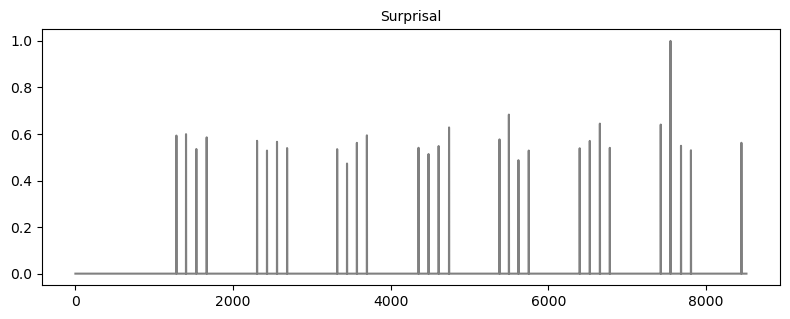

In [136]:
#plotting stimuli support vectors
fig, axes = plt.subplots(2, 1, figsize = (8,6))
stim_path = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_mTRF_data/listen_mTRF_data_normalized_surprisal_shuffled_surprisal/mTRF_normalized_listen_post_01.mat'
data = loadmat(stim_path)

for i in [0,1]:
    try:
        axes[i].plot(
                    data['stimuli'][0,:,i],
                    color = 'grey'
                    )
    except IndexError:
        axes[i].set_visible(False)

axes[0].set_title('Surprisal', fontsize = 10)
axes[1].set_title('Surprisal', fontsize = 10)

plt.tight_layout()

In [79]:
"""from statannotations.Annotator import Annotator

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Define the groups and corresponding colors
groups = ['musicians', 'nonmusicians']
colors = ['steelblue', 'darkgoldenrod']  # Define specific colors for musicians and nonmusicians

# Loop through each group to create subplots
for j, group in enumerate(groups):
    # Subset the DataFrame for the current group
    df_group = mtrf_df[mtrf_df['group'] == group]
    
    # Create the plot using Seaborn with a specific color for each group
    sns.lineplot(
        data=df_group,
        x='period',
        y='mean_r',
        hue='subject',
        marker='o',
        ax=axs[j],
        legend=None,
        palette=[colors[j]] * df_group['subject'].nunique()  # Use the same color for all subjects in the group
    )

    # Statistical annotation
    pairs = [('pre', 'post')]
    annotator = Annotator(axs[j], pairs, data=df_group, x='period', y='mean_r')
    annotator.configure(test='Wilcoxon', text_format='star', loc='inside')
    annotator.apply_and_annotate()
    
    axs[j].set_title(group.capitalize())
    axs[j].set_ylabel('Prediction correlation (r)')
    axs[j].set_xlabel('Training')
fig.suptitle(f'{features}')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()
"""

"from statannotations.Annotator import Annotator\n\n# Create the plot\nfig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)\n\n# Define the groups and corresponding colors\ngroups = ['musicians', 'nonmusicians']\ncolors = ['steelblue', 'darkgoldenrod']  # Define specific colors for musicians and nonmusicians\n\n# Loop through each group to create subplots\nfor j, group in enumerate(groups):\n    # Subset the DataFrame for the current group\n    df_group = mtrf_df[mtrf_df['group'] == group]\n    \n    # Create the plot using Seaborn with a specific color for each group\n    sns.lineplot(\n        data=df_group,\n        x='period',\n        y='mean_r',\n        hue='subject',\n        marker='o',\n        ax=axs[j],\n        legend=None,\n        palette=[colors[j]] * df_group['subject'].nunique()  # Use the same color for all subjects in the group\n    )\n\n    # Statistical annotation\n    pairs = [('pre', 'post')]\n    annotator = Annotator(axs[j], pairs, data=df_group, x='per

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post: Wilcoxon test (paired samples), P_val:1.367e-02 Stat=4.000e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

pre vs. post: Wilcoxon test (paired samples), P_val:3.750e-01 Stat=1.800e+01


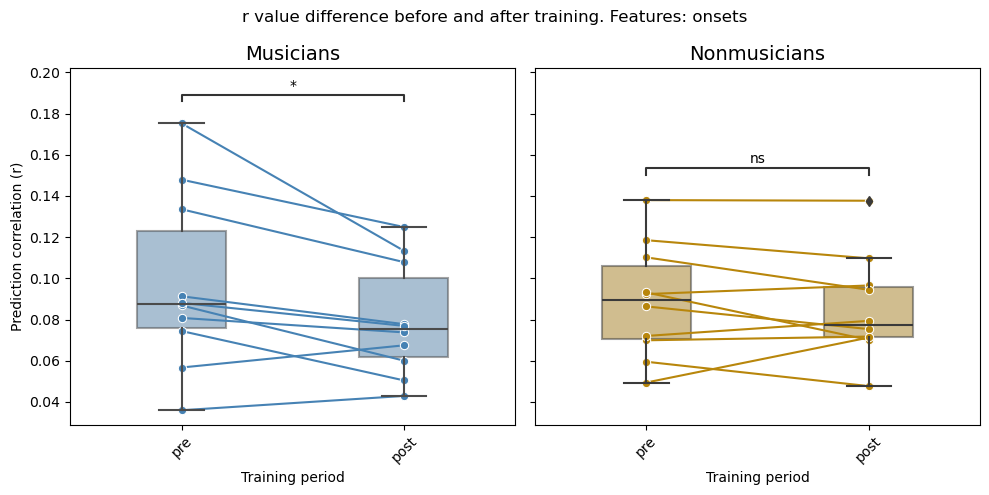

In [80]:


# Create the plot with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Define the groups and corresponding colors
groups = ['musicians', 'nonmusicians']
colors = ['steelblue', 'darkgoldenrod']  # Colors for musicians and nonmusicians

# Loop through each group to create subplots
for j, group in enumerate(groups):
    # Subset the DataFrame for the current group
    df_group = mtrf_df[mtrf_df['group'] == group]

    # Plot individual subject lines
    sns.lineplot(
        data=df_group,
        x='period',
        y='mean_r',
        hue='subject',
        marker='o',
        ax=axs[j],
        legend=None,
        palette=[colors[j]] * df_group['subject'].nunique()  # Uniform color for subjects
    )

    # Add a box plot to show the summary statistics
    sns.boxplot(
        data=df_group,
        x='period',
        y='mean_r',
        ax=axs[j],
        color=colors[j],
        width=0.4,  # Adjust width to avoid overlap
        boxprops=dict(alpha=0.5)  # Semi-transparent to show both box and line
    )

    # Statistical annotation
    pairs = [('pre', 'post')]
    annotator = Annotator(axs[j], pairs, data=df_group, x='period', y='mean_r')
    annotator.configure(test='Wilcoxon', text_format='star', loc='inside')
    annotator.apply_and_annotate()
    
    # Set title and labels
    axs[j].set_title(group.capitalize(), fontsize=14)
    axs[j].set_ylabel('Prediction correlation (r)')
    axs[j].set_xlabel('Training period')
    axs[j].tick_params(axis='x', rotation=45)

fig.suptitle(f'r value difference before and after training. Features: {features}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [81]:
"""
wilcoxon(df[(df['period']=='pre') & (df['group']== 'musicians')]['mean_r'], 
                df[(df['period']=='post') & (df['group']=='musicians')]['mean_r'])
"""

"\nwilcoxon(df[(df['period']=='pre') & (df['group']== 'musicians')]['mean_r'], \n                df[(df['period']=='post') & (df['group']=='musicians')]['mean_r'])\n"

### mTRF visualization

In [82]:
mean_weights = mtrf_df['mTRF_weights'].mean() #averaging mTRF weights across all subjects

#load time vector
with open('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/utils/mTRF_times-0_1to0_3.pkl', 'rb') as file:
    mtrf_times = pickle.load(file)

In [83]:
#plot AM mTRF
"""fig, axes = plt.subplots(2,1)

for i in range(mean_weights.shape[0]):
    axes[i].plot(mtrf_times, mean_weights[i,:])

axes[0].set_title('Onsets')
axes[1].set_title('Surprisal')

plt.tight_layout()"""

"fig, axes = plt.subplots(2,1)\n\nfor i in range(mean_weights.shape[0]):\n    axes[i].plot(mtrf_times, mean_weights[i,:])\n\naxes[0].set_title('Onsets')\naxes[1].set_title('Surprisal')\n\nplt.tight_layout()"

In [84]:
mean_weights.shape

(1, 53, 64)

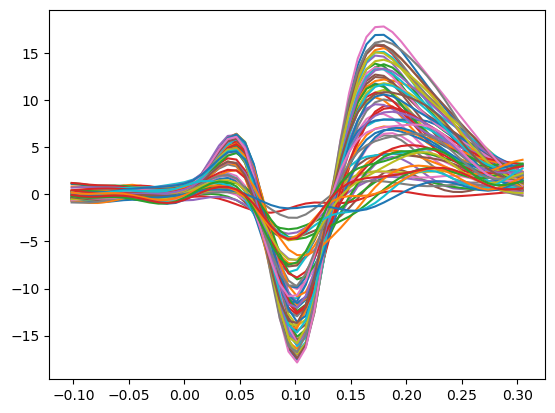

In [85]:
#plot onset only mTRF
plt.figure()
plt.plot(mtrf_times, mean_weights[0])

### Comparing onset-only and AM mTRFs

In [86]:
#loading all mTRF data (r values only)

periods = ['pre', 'post']
features_tocompare = ['onsets', 'surprisal']

subjects_to_process = good_listen_subjects

mtrf_df_tocompare = pd.DataFrame(columns=['subject', 'group', 'period', 'mean_r', 'features'])

for feature in features_tocompare:
    mtrf_dir_tocompare = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_mTRF_data/listen_mTRF_data_normalized_{feature}'
    for subject in subjects_to_process:
        for period in periods:
            # Load the data from the .mat file
            mTRF_data = loadmat(f'{mtrf_dir_tocompare}/mTRF_normalized_listen_{period}_{subject}.mat')
            
            # Determine the group based on the subject
            if subject in musicians:
                group = 'musicians'
            else:
                group = 'nonmusicians'
            
            # Calculate the mean of 'r' values
            mean_r = mTRF_data['r'][0].mean()
            mTRF_weights = mTRF_data['weights']

            if load_stimuli:
                stimuli_segments = mTRF_data['stimuli']
            
            # Append a new row to the DataFrame
            mtrf_df_tocompare = mtrf_df_tocompare.append({
                'subject': subject,
                'group': group,
                'period': period,
                'mean_r': mean_r,
                'features': feature
               
            }, ignore_index=True)


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/1291429277.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtrf_df_tocompare = mtrf_df_tocompare.append({
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/1291429277.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtrf_df_tocompare = mtrf_df_tocompare.append({
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/1291429277.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtrf_df_tocompare = mtrf_df_tocompare.append({
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/1291429277.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [87]:
mtrf_df_tocompare

,subject,group,period,mean_r,features
0,01,nonmusicians,pre,0.086382,onsets
1,01,nonmusicians,post,0.075381,onsets
2,02,musicians,pre,0.133554,onsets
3,02,musicians,post,0.107882,onsets
4,03,nonmusicians,pre,0.048944,onsets
...,...,...,...,...,...
79,19,nonmusicians,post,0.138093,surprisal
80,20,nonmusicians,pre,0.071967,surprisal
81,20,nonmusicians,post,0.079049,surprisal
82,21,musicians,pre,0.057049,surprisal


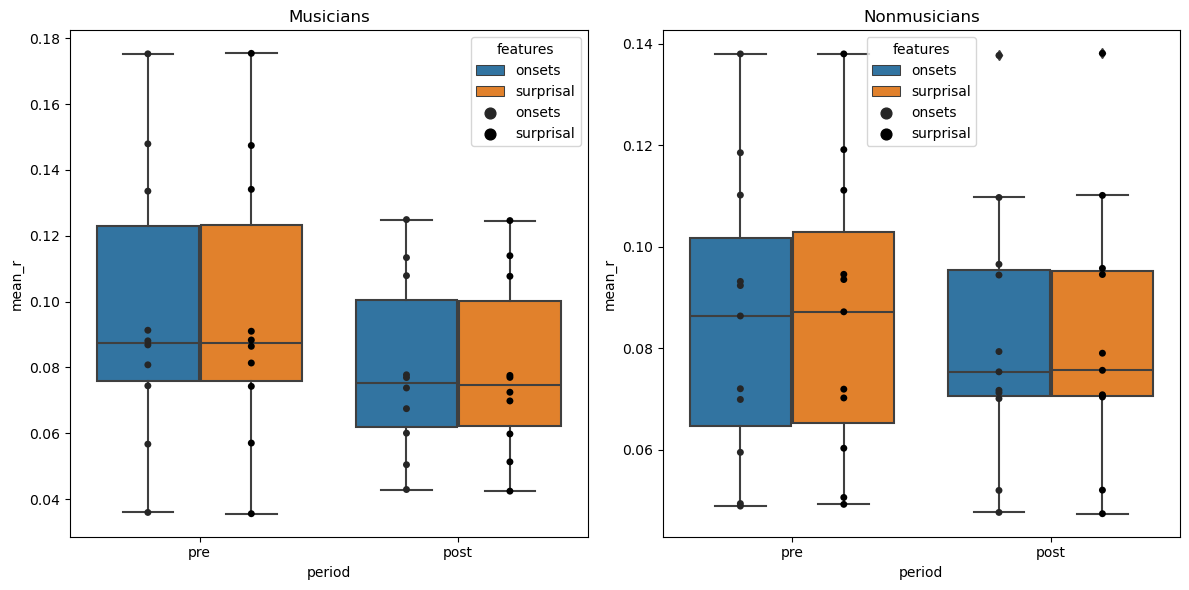

In [88]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))

# Define the groups as strings
groups = ['musicians', 'nonmusicians']

for i, group in enumerate(groups):
    sns.boxplot(data=mtrf_df_tocompare[mtrf_df_tocompare['group'] == group], x='period', y='mean_r', hue='features', ax=axes[i])
    sns.stripplot(data=mtrf_df_tocompare[mtrf_df_tocompare['group'] == group], x='period', y='mean_r', hue='features', jitter=False, dodge=True, color='black', ax=axes[i])

    axes[i].set_title(f'{group.capitalize()}')
    
plt.tight_layout()
plt.show()


Change in R

In [89]:
#prepare dataframe to plot change in r per subject across different features

temp_onsets = mtrf_df_tocompare[mtrf_df_tocompare['features'] == 'onsets']
temp_surprisal = mtrf_df_tocompare[mtrf_df_tocompare['features'] == 'surprisal']

mTRF_rdiff = pd.merge(temp_onsets, temp_surprisal, on=['subject', 'group', 'period'], suffixes = ('_onsets', '_surprisal'))
mTRF_rdiff['delta_r'] = mTRF_rdiff['mean_r_surprisal']-mTRF_rdiff['mean_r_onsets']

In [90]:
mTRF_rdiff[(mTRF_rdiff['group'] =='musicians') & (mTRF_rdiff['period']=='pre')]

,subject,group,period,mean_r_onsets,features_onsets,mean_r_surprisal,features_surprisal,delta_r
2,02,musicians,pre,0.133554,onsets,0.134099,surprisal,0.000545
10,06,musicians,pre,0.086862,onsets,0.086433,surprisal,-0.000429
12,07,musicians,pre,0.080805,onsets,0.081364,surprisal,0.000560
22,12,musicians,pre,0.035985,onsets,0.035597,surprisal,-0.000388
24,13,musicians,pre,0.091307,onsets,0.091008,surprisal,-0.000299
26,14,musicians,pre,0.175248,onsets,0.175399,surprisal,0.000150
28,15,musicians,pre,0.147915,onsets,0.147412,surprisal,-0.000503
32,17,musicians,pre,0.074438,onsets,0.074275,surprisal,-0.000163
34,18,musicians,pre,0.088090,onsets,0.088345,surprisal,0.000254
40,21,musicians,pre,0.056730,onsets,0.057049,surprisal,0.000319


musicians pre t =  0.036198024251204955 p = 0.9719146206338585
musicians post t =  0.3667061299275386 p = 0.722311462401768
nonmusicians pre t =  4.583801550281638 p = 0.0010047526647417931
nonmusicians post t =  -0.6685115999412508 p = 0.5189398019008797


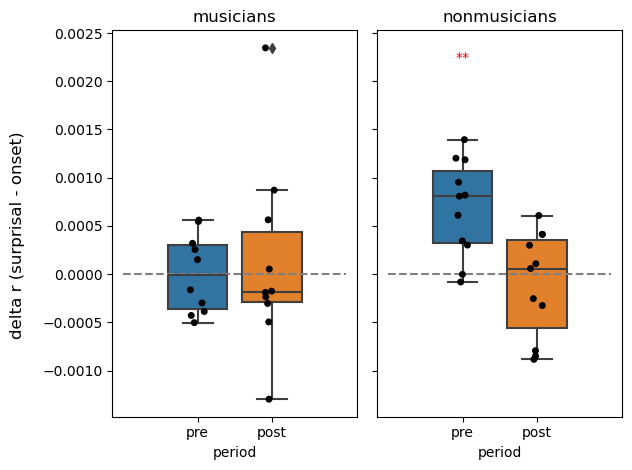

In [91]:
fig, axes = plt.subplots(1, 2, sharey=True)

groups = ['musicians', 'nonmusicians']  

for i, group in enumerate(groups):
    sns.boxplot(data=mTRF_rdiff[mTRF_rdiff['group'] == group], x='period', y='delta_r', ax=axes[i])
    sns.stripplot(data=mTRF_rdiff[mTRF_rdiff['group'] == group], x='period', y='delta_r', ax=axes[i], color='black')
    axes[i].set_title(group)
    axes[i].set_ylabel('')
    axes[i].hlines(0, -1, 2, color='grey', linestyles="--")

    # Statistical tests and star placement
    for j, period in enumerate(['pre', 'post']):
        r_sub = mTRF_rdiff[(mTRF_rdiff['group'] == group) & (mTRF_rdiff['period'] == period)]['delta_r']
        t_stat, p_value = ttest_1samp(r_sub, 0)
        print(group, period, 't = ', t_stat, 'p =', p_value)
        
       
        if p_value < 0.05:
            axes[i].text(j, 0.0022, '**', ha='center', color='red') 

fig.supylabel('delta r (surprisal - onset)')
plt.tight_layout()


#### Comparison with shuffled surprisal or onset values

In [92]:
#loading all mTRF data (r values only)
mtrf_df_tocompare = pd.DataFrame()
period = 'post'
feature = 'surprisal' #surprisal or onsets

mtrf_dir_original = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_mTRF_data/listen_mTRF_data_normalized_{feature}'
mtrf_dir_shuffled = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_mTRF_data/listen_mTRF_data_normalized_{feature}_shuffled_{feature}'
dirs_tocompare = [mtrf_dir_original, mtrf_dir_shuffled]
shuffled = [0,1]

for i, dir in enumerate(dirs_tocompare):
    for subject in subjects_to_process:
            # Load the data from the .mat file
            mTRF_data = loadmat(f'{dir}/mTRF_normalized_listen_{period}_{subject}.mat')
            
            # Determine the group based on the subject
            if subject in musicians:
                group = 'musicians'
            else:
                group = 'nonmusicians'
            
            # Calculate the mean of 'r' values
            mean_r = mTRF_data['r'][0].mean()
            mTRF_weights = mTRF_data['weights']

            if load_stimuli:
                stimuli_segments = mTRF_data['stimuli']
            
            # Append a new row to the DataFrame
            mtrf_df_tocompare = mtrf_df_tocompare.append({
                'subject': subject,
                'group': group,
                'period': period,
                'mean_r': mean_r,
                'shuffled': shuffled[i]
                
            }, ignore_index=True)

        


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/2538989277.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtrf_df_tocompare = mtrf_df_tocompare.append({
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/2538989277.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtrf_df_tocompare = mtrf_df_tocompare.append({
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/2538989277.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mtrf_df_tocompare = mtrf_df_tocompare.append({
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_17403/2538989277.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [93]:
#merging shuffled and unshuffled values and taking the difference

shuffled_df = mtrf_df_tocompare[mtrf_df_tocompare['shuffled']==1]
unshuffled_df = mtrf_df_tocompare[mtrf_df_tocompare['shuffled']==0]
shuffle_diff_df = pd.merge(unshuffled_df, shuffled_df, on = ['group', 'subject', 'period'], suffixes=('_unshuffled', '_shuffled'))
shuffle_diff_df['delta_r'] = shuffle_diff_df['mean_r_unshuffled']-shuffle_diff_df['mean_r_shuffled']

nonmusicians t =  0.4247106778707708 p = 0.6800406360833369
musicians t =  1.7862069970755363 p = 0.10771486228536452


(-0.0018250158519772961, 0.004956499778828982)

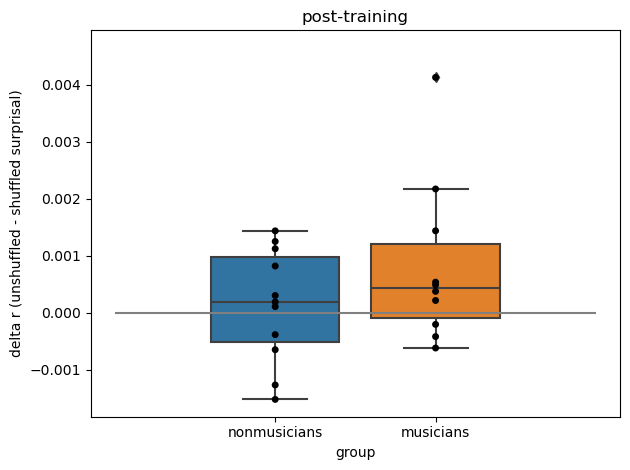

In [94]:
plt.figure()
sns.boxplot(data=shuffle_diff_df, x='group', y='delta_r')
sns.stripplot(data=shuffle_diff_df, x='group', y='delta_r', dodge=True, jitter=False, color='black')
plt.hlines(0, -1, 2, color='grey')
plt.ylabel(f'delta r (unshuffled - shuffled {feature})')
plt.title(f'{period}-training')

# Statistical tests and star placement
groups = shuffle_diff_df['group'].unique()

for i, group in enumerate(groups):
    r_sub = shuffle_diff_df[shuffle_diff_df['group'] == group]['delta_r']
    t_stat, p_value = ttest_1samp(r_sub, 0)
    print(group, 't = ', t_stat, 'p =', p_value)
    
    # Place stars above each group if p-value < 0.05
    if p_value < 0.05:
        plt.text(i, max(shuffle_diff_df['delta_r']) * 1.08, '**', ha='center', color='red')  # Adjust y position if necessary

plt.tight_layout()
plt.ylim(min(shuffle_diff_df['delta_r'])*1.2, max(shuffle_diff_df['delta_r']) * 1.2)


Text(0.5, 1.0, 'shuffled vs unshuffled surprisal')

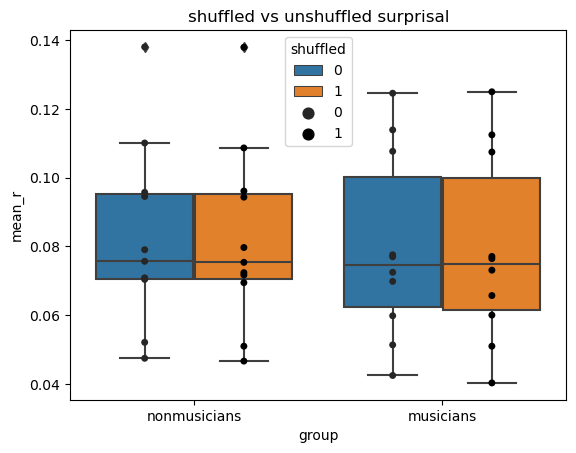

In [95]:
plt.figure()
sns.boxplot(data = mtrf_df_tocompare, x = 'group', y = 'mean_r', hue = 'shuffled')
sns.stripplot(data = mtrf_df_tocompare, x = 'group', y = 'mean_r', hue = 'shuffled', jitter = False, dodge = True, color = 'black')
plt.title(f'shuffled vs unshuffled {feature}')
